In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def doc_input (ten_file):
    print("======================================================")
    print("Kieu du lieu dau vao: ")
    print("1. Ngang")
    print("2. Doc")
    chon = int(input("chon kieu dau vao: "))
    if(chon == 1):
        # doc file input.txt
        inp = open(ten_file, "r")
        # doc du lieu cua x va y
        x = inp.readline()
        y = inp.readline()
        # xu ly du lieu cua x va y
        x = x.strip().split()
        x = np.array(x, dtype=float)
        if (y == ""):
            y = f(x)
            y = np.array(y, dtype=float)
            inp.close()
        else:
            y = y.strip().split()
            y = np.array(y, dtype=float)
            inp.close()
    else:
        x = list()
        y = list()
        f = open("input.txt")
        for z in f:
            z = z.strip().split()
            x.append(float(z[0]))
            y.append(float(z[1]))
        x = np.array(x, dtype=float)
        y = np.array(y, dtype=float)

    return x, y

def kiem_tra_input (x, y):
    #tra ve 1 khi input hop le va 0 khi input khong hop le
    # kiem tra kich thuoc du lieu
    if (x.shape[0] != y.shape[0]):
        print("kich thuoc khong hop le")
        return 0
    
    # kiem tra du lieu trung
    for i in x:
        if (np.where(x == i)[0].shape[0] > 1):
            print("du lieu cua x o cac vi tri ", np.where(x == i)[0], " trung nhau")
            return 0
    # input hop le
    print("input hop le")
    return 1

In [10]:
def hoocne_quatient(a, x):
    # chia gia tri cua da thuc P(x) cho (x - x_0)
    # tra ve b và b_0 trong do:
    # b la he so cua da thuc sau khi chia
    # b_0 la phan du va la ket qua cua P(x)
    y = list()
    y.append(a[0])
    for i in range(len(a) - 1):
        y.append(y[i] * x + a[i + 1])
    b = np.array(y[:-1])
    b_0 = np.array(y[-1])
    return b, b_0

Các công thức hàm ghép trơn cấp 2:\
Đa thức: $\displaystyle S(x)=-\frac{m_i}{2h_i}(x - x_{i+1})^2+\frac{m_{i+1}}{2h_i}(x-x_i)^2+A_i, \quad A_i = y_i + \frac{m_ih_i}{2}$\
Hệ số:\
$\displaystyle a_2=\frac{m_{i+1}-m_i}{2h_i}$\
$\displaystyle a_1=\frac{m_ix_{i+1}-m_{i+1}x_i}{h_i}$\
$\displaystyle a_0=\frac{-m_ix_{i+1}^2+m_{i+1}x_i^2}{2h_i}+A_i, \quad A_i = y_i + \frac{m_ih_i}{2}$\
Ma trận xác định $m_i$:
$$
\begin{cases}
\displaystyle m_0 &= f'(a)\\
\displaystyle m_{i+1} + m_i &= \displaystyle\frac{2(y_{i+1}-y_i)}{h_i}. \quad i = [1, n]
\end{cases}
$$

In [11]:
# hàm ghép trơn bậc 2
def ghep_tron_bac_2(x, y):
    S = list()
    m = list()
    h = list()

    m.append((y[1] - y[0]) / (x[1] - x[0]))

    for i in range(0, len(x) - 1):
        h.append(x[i + 1] - x[i])
        m.append(-m[i] + 2/h[i]*(y[i + 1] - y[i]))
        s = list()
        s.append((m[i + 1] - m[i]) / (2 * h[i]))
        s.append((m[i] * x[i + 1] - m[i + 1] * x[i]) / h[i])
        s.append((-m[i]*x[i+1]**2 + m[i+1]*x[i]**2)/(2*h[i]) + y[i] + m[i]*h[i]/2)
        S.append(np.array(s))

    return S

Các công thức hàm ghép trơn cấp 3:\
Đa thức: $$S(x) = \frac{-m_k(x-x_{k+1})^3 + m_{k+1}(x-x_k)^3}{6h_k} + \phi_k(x-x_k) + \theta_k(x-x_{k+1})$$
với: $\phi_k =\displaystyle \frac{y_{k+1}}{h_k} - \frac{m_{k+1}h_k}{6},\quad \theta_k = \displaystyle\frac{y_k}{h_k} - \frac{m_kh_k}{6}$\
Hệ số:\
$\displaystyle a_3 = \frac{-m_i + m_{i+1}}{6h_i}$\
$\displaystyle a_2 = \frac{m_ix_{i+1} - m_{i+1}x_i}{2h_i}$\
$\displaystyle a_1 = \frac{-m_ix_{i+1}^2 + m_{i+1}x_i^2}{2h_i} + \phi_i - \theta_i$\
$\displaystyle a_0 = \frac{m_ix_{i+1}^3 - m_{i+1}x_i^3}{6h_i} - \phi_ix_i + \theta_ix_{i+1}$\
với: $\phi_k =\displaystyle \frac{y_{k+1}}{h_k} - \frac{m_{k+1}h_k}{6},\quad \theta_k = \displaystyle\frac{y_k}{h_k} - \frac{m_kh_k}{6}$\
Ma trận xác định $m_i$:
$$
\begin{cases}
2m_0 + \lambda_0m_1 = \displaystyle\frac{6}{h_1}\left(\frac{y_1-y_0}{h_1}-f'(a)\right)\\
\mu_im{i} + 2m_{i+1} + \lambda_im_{i+2} = d_i \quad i=[0, n-2]\\
\mu_nm_{n-1} + 2m_n = \displaystyle\frac{6}{h_{n-1}}\left(f'(b)-\frac{y_n-y_{n-1}}{h_{n-1}}\right)
\end{cases}
$$
với: $\lambda_i = \displaystyle\frac{h_{i+1}}{h_i + h_{i+1}},\quad \mu = 1 - \lambda,\quad d=\displaystyle\frac{6}{h_i+h_{i+1}}\left(\frac{y_{i+2}-y_{i+1}}{h_{i+1}}-\frac{y_{i+1}-y_i}{h_i}\right)$

In [12]:
# hàm ghép trơn bậc 3
def ghep_tron_bac_3(x, y):
    S = list()
    h = list()
    m = list()
    lamda = list()
    muy = list()
    d = list()
    alpha = list()
    beta = list()
    phi = list()
    theta = list()

    lamda.append(1)
    muy.append(0)
    d.append(0)
    h.append(x[1] - x[0])

    alpha.append(0)
    beta.append(0)

    for i in range(0, len(x) - 2):
        h.append(x[i + 2] - x[i + 1])
        alpha.append(lamda[i] / (-2 - muy[i] * alpha[i]))
        beta.append((beta[i]*muy[i] - d[i])/(-2 - muy[i] * alpha[i]))
        lamda.append(h[i+1]/(h[i] + h[i+1]))
        muy.append(1 - lamda[i+1])
        d.append(6*((y[i+2] - y[i+1])/h[i+1] - (y[i+1] - y[i])/h[i])/(h[i] + h[i+1]))

    alpha.append(lamda[-1]/(-2 - muy[-1]*alpha[-1]))
    beta.append((beta[-1]*muy[-1] - d[-1])/(-2 - muy[-1]*alpha[-2]))

    lamda.append(0)
    muy.append(1)
    d.append(0)

    m.append((muy[-1]*beta[-1] - d[-1])/(-2 - muy[-1]*alpha[-1]))

    for i in range(len(x) - 2, -1, -1):
        m.append(alpha[i+1]*m[-1] + beta[i+1])
        phi.append(y[i+1]/h[i] - m[-2]*h[i]/6)
        theta.append(y[i]/h[i] - m[-1]*h[i]/6)
        s = list()
        s.append((-m[-1] + m[-2])/(6*h[i]))
        s.append((m[-1]*x[i+1] - m[-2]*x[i])/(2*h[i]))
        s.append((-m[-1]*x[i+1]**2 + m[-2]*x[i]**2)/(2*h[i]) + phi[-1] - theta[-1])
        s.append((m[-1]*x[i+1]**3 - m[-2]*x[i]**3)/(6*h[i]) - phi[-1]*x[i] + theta[-1]*x[i+1])
        S.append(np.array(s))
    S.reverse()
    return S

In [13]:
def ve_do_thi1(x, y, S2):
    plt.plot(x, y, 'ro')
    for i in range(len(S2)):
        x_0 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_0 = hoocne_quatient(S2[i], x_0)[1]
        plt.plot(x_0, y_0, 'b')
    plt.show()

def ve_do_thi2(x, y, S3):
    plt.plot(x, y, 'ro')
    for i in range(len(S3)):
        x_0 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_0 = hoocne_quatient(S3[i], x_0)[1]
        plt.plot(x_0, y_0, 'g')
    plt.show()

def ve_do_thi1_2(x, y, S2, S3):
    plt.plot(x, y, 'ro')
    for i in range(len(S2)):
        x_0 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_0 = hoocne_quatient(S2[i], x_0)[1]
        plt.plot(x_0, y_0, 'b')
    
    for i in range(len(S3)):
        x_0 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_0 = hoocne_quatient(S3[i], x_0)[1]
        plt.plot(x_0, y_0, 'g')
    plt.show()

Chạy chương trình

Kieu du lieu dau vao: 
1. Ngang
2. Doc
input hop le
HÀM GHÉP TRƠN BẬC 2
da thuc S2(x) = 
S[3.0, 3.2](x) = 0.0x^2 + -1.9280641499999955x + 6.7841924499999955
S[3.2, 3.4](x) = 4.06458999999999x^2 + -27.941440149999934x + 48.40559404999989
S[3.4, 3.6](x) = -1.7875279999999727x^2 + 11.85296224999981x + -19.244890029999667
S[3.6, 3.8](x) = 3.077298749999972x^2 -23.173790349999795x + 43.803264649999626


C:\Users\Admin\AppData\Local\Temp\ipykernel_18020\2433918203.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b = np.array(y[:-1])


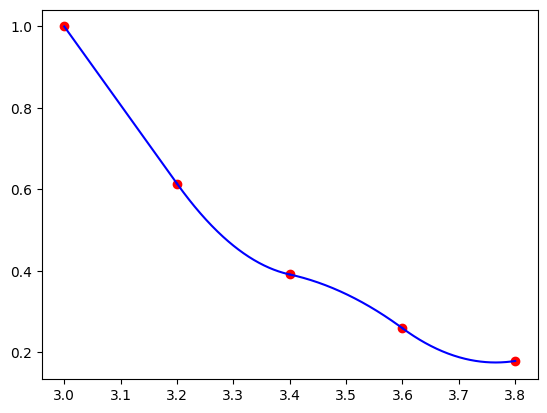

HÀM GHÉP TRƠN BẬC 3
da thuc S3(x) = 
S[3.0, 3.2](x) = 8.242807812499956x^3 + -75.83383187499959x^2 + 230.51911616249876x + -230.60867254999872
S[3.2, 3.4](x) = -4.405473437499958x^3 + 45.58966812499958x^2 + -158.0360838374986x + 183.85020744999844
S[3.4, 3.6](x) = 0.44144593749996053x^3 + -3.848909499999583x^2 + 10.055080087498535x + -6.653111664998284
S[3.6, 3.8](x) = -2.296766562499979x^3 + 25.723785499999767x^2 -96.40662191249913x + 121.10093073499891


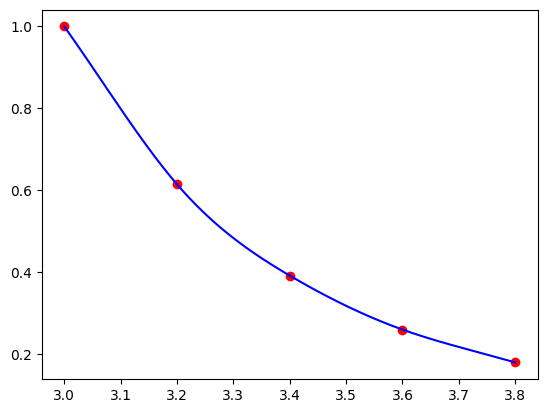

None


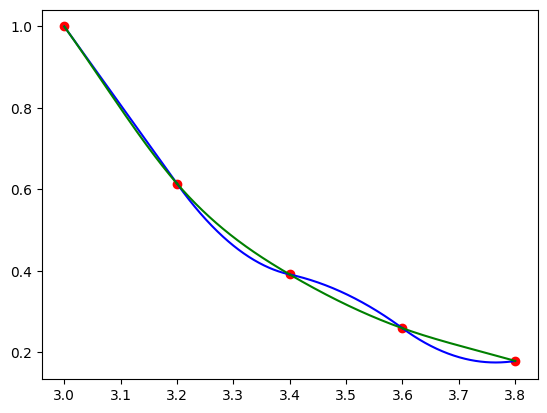

Nhap vao x de tinh gia tri cua S2(x) va S3(x)
[ 0.         -1.92806415  6.78419245]
[   8.24280781  -75.83383187  230.51911616 -230.60867255]
S2(3.1) = 0.8071935850000092
S3(3.1) = 0.7989507771875992
Nhap vao x de tinh gia tri cua S2(x) va S3(x)
[  4.06459    -27.94144015  48.40559405]
[  -4.40547344   45.58966812 -158.03608384  183.85020745]
S2(3.3) = 0.46222665500000204
S3(3.3) = 0.4831177440624117
Nhap vao x de tinh gia tri cua S2(x) va S3(x)
[ -1.787528    11.85296225 -19.24489003]
[ 0.44144594 -3.8489095  10.05508009 -6.65311166]
S2(3.5) = 0.3432598450000057
S3(3.5) = 0.31752183656249766
Nhap vao x de tinh gia tri cua S2(x) va S3(x)
[  3.07729875 -23.17379035  43.80326465]
[ -2.29676656  25.7237855  -96.40662191 121.10093073]
S2(3.7) = 0.1884602425000068
S3(3.7) = 0.21693646343751993
Nhap vao x de tinh gia tri cua S2(x) va S3(x)


ValueError: could not convert string to float: ''

In [14]:
x, y = doc_input("input.txt")
if (kiem_tra_input(x, y) == 1):
    S2 = ghep_tron_bac_2(x, y)
    print("====================================================================================================")
    print("HÀM GHÉP TRƠN BẬC 2")
    print("da thuc S2(x) = ")
    for i in range(len(S2) - 1):
        print("S[{}, {}](x) = {}x^2 + {}x + {}".format(x[i], x[i + 1], S2[i][0], S2[i][1], S2[i][2]))
    print("S[{}, {}](x) = {}x^2 {}x + {}".format(x[-2], x[-1], S2[-1][0], S2[-1][1], S2[-1][2]))
    ve_do_thi1(x, y, S2)
    
    S3 = ghep_tron_bac_3(x, y)
    print("====================================================================================================")
    print("HÀM GHÉP TRƠN BẬC 3")
    print("da thuc S3(x) = ")
    for i in range(len(S3) - 1):
        print("S[{}, {}](x) = {}x^3 + {}x^2 + {}x + {}".format(x[i], x[i + 1], S3[i][0], S3[i][1], S3[i][2], S3[i][3]))
    print("S[{}, {}](x) = {}x^3 + {}x^2 {}x + {}".format(x[-2], x[-1], S3[-1][0], S3[-1][1], S3[-1][2], S3[-1][3]))
    print(ve_do_thi1(x, y, S3))


    ve_do_thi1_2(x, y, S2, S3)

    while(True):
        print("====================================================================================================")
        print("Nhap vao x de tinh gia tri cua S2(x) va S3(x)")
        x_0 = float(input())
        location = 0
        for i in range(len(x) - 1):
            if x[i] <= x_0 and x_0 <= x[i + 1]:
                location = i
                break
        print(S2[location])
        print(S3[location])
        print("S2({}) = {}".format(x_0, hoocne_quatient(S2[location], x_0)[1]))
        print("S3({}) = {}".format(x_0, hoocne_quatient(S3[location], x_0)[1]))
else:
    print("Input khong hop le")

Thuật toán:\
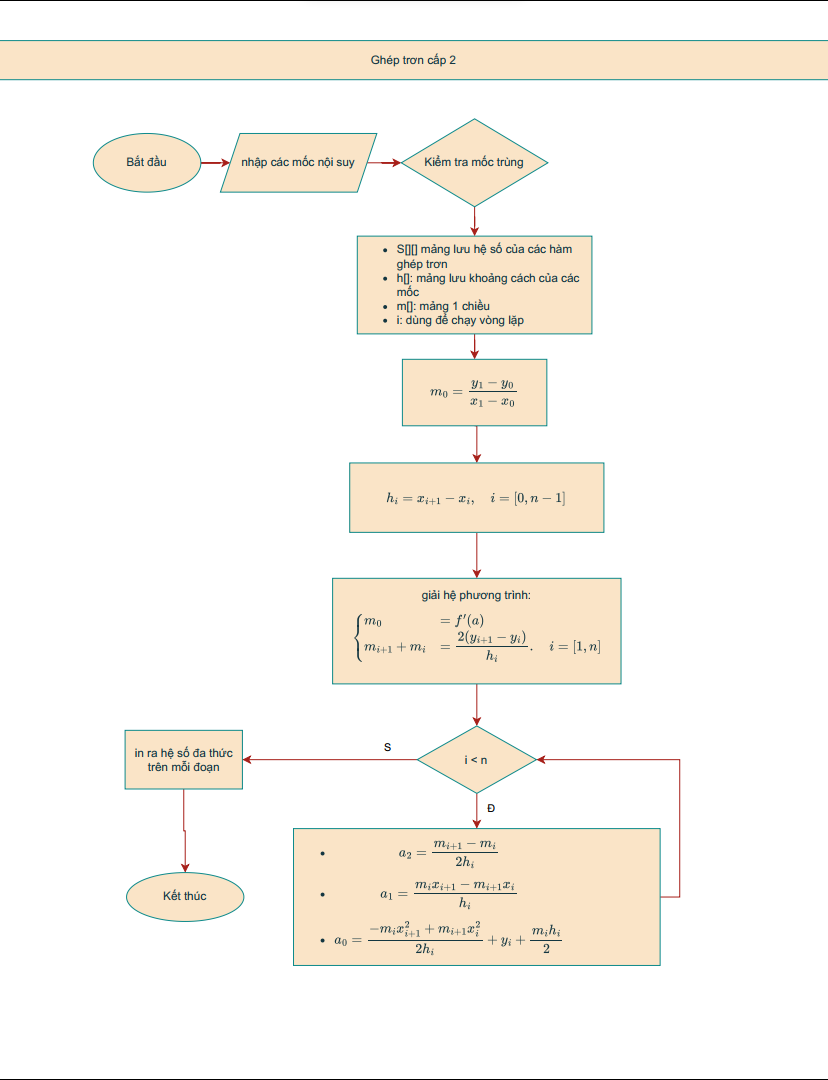\
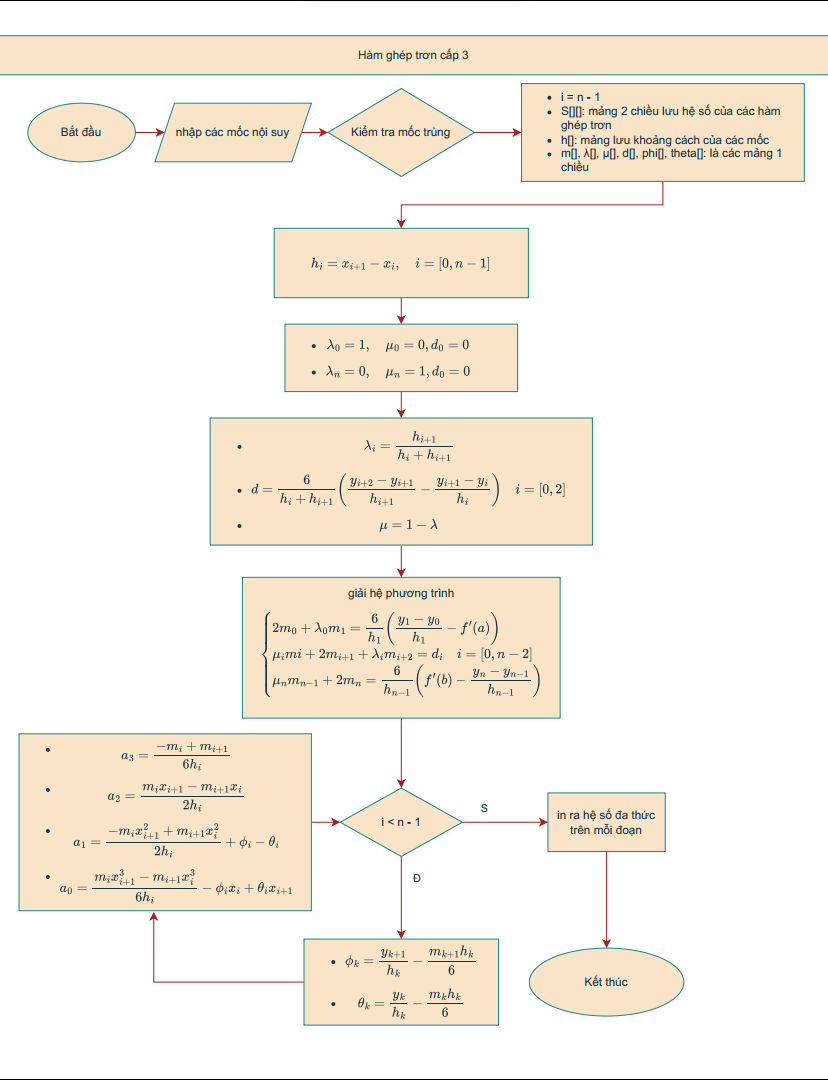